In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from Ps_library_temp import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Study the operator for distributive spontaneous emission

In [51]:
system = Ps_system(N_atoms = 1,N_points =200)
rabi0 = 0#2*np.pi*(240e-3)
chirp = 0#2*np.pi*(50e-3)
detuning = 0
direction = 1
pulse_duration = 10
system.flag_SE_distributive = True

laser_guess = {"label":"laser","order":0,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":direction,"start":0,"end":int(3*pulse_duration),"notch":0}
system.init_pulse(laser_guess)
system.init_pulse_cycle()
laser = system.laserDict[0][1]
#system.init_distribution_flattop()
system.init_distribution_MB()
system.create_composite(laser)
system.init_states_excited()


initial_state = system.states.unit()

args = {"chirp":np.asarray(laser.chirp(laser.tlist,None)),
        "wavevector":laser.direction,
        "rabi":np.asarray(laser.rabi(laser.tlist,None)),
        "beating":np.asarray(laser.rabi_beating2(laser.tlist,None)),
        "selector1":laser.selector1,
        "selector2":laser.selector2,
        "tlist":laser.tlist,
        "omega_L0":laser.omega_L0}
system.set_Hamiltonian_MT(args)
#system.set_Hamiltonian_noCMT(args)
opts = qt.Options(store_states=True)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_state,c_ops=system.c_ops,progress_bar=True,options = opts)

10.2%. Run time:   2.31s. Est. time left: 00:00:00:20
20.2%. Run time:   4.27s. Est. time left: 00:00:00:16
30.2%. Run time:   6.21s. Est. time left: 00:00:00:14
40.2%. Run time:   8.30s. Est. time left: 00:00:00:12
50.1%. Run time:  10.53s. Est. time left: 00:00:00:10
60.1%. Run time:  12.83s. Est. time left: 00:00:00:08
70.1%. Run time:  14.99s. Est. time left: 00:00:00:06
80.1%. Run time:  17.47s. Est. time left: 00:00:00:04
90.0%. Run time:  19.97s. Est. time left: 00:00:00:02
Total run time:  22.37s


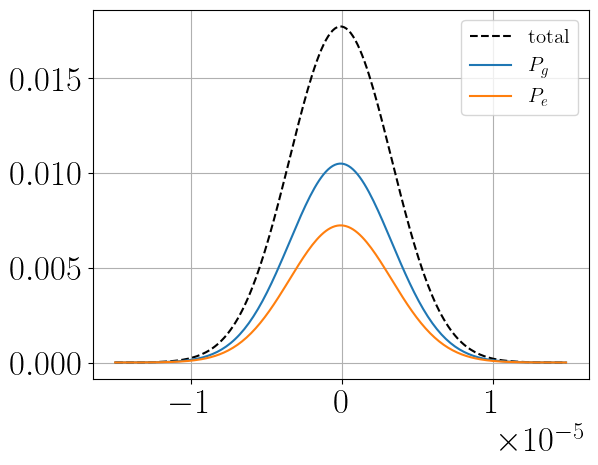

In [53]:
final_states = np.asarray(result.expect)[:,-1]
plt.plot(system.velocity_bins,np.asarray(result.expect)[200:400,0],label=r"total",color="black",ls="dashed")
plt.plot(system.velocity_bins,final_states[0:200],label=r"$P_g$")
plt.plot(system.velocity_bins,final_states[200:400],label=r"$P_e$")
#plt.plot(system.velocity_bins,final_states[250:500]+final_states[0:250],label=r"$P_e$")
plt.grid()
#plt.ylim(0,0.005)
plt.legend(fontsize=15)

In [44]:
handler = data_handler()
print("before: {}".format(handler.expect_standard_deviation(result.states[0],N_bins=system.N_points)))
print("after: {}".format(handler.expect_standard_deviation(result.states[-1],N_bins=system.N_points)))




IndexError: list index out of range